## Implementation of dropout for Regression Data

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Generate Data

In [9]:
X_train = np.linspace(-1, 1, 20)

In [10]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  , 
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475, 
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,  
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [11]:
X_test = np.linspace(-1, 1, 20)

In [12]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,  
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

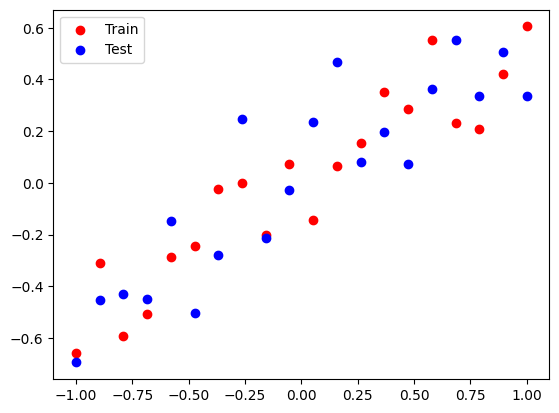

In [13]:
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.legend()
plt.show()

# Regression Model

In [14]:
model_1 = Sequential()
model_1.add(Dense(128, input_dim=1, activation="relu"))
model_1.add(Dense(128, activation="relu"))
model_1.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_1.compile(loss='mse', optimizer=adam, metrics=['mse'])
history = model_1.fit(X_train, y_train, epochs=500, 
                    validation_data = (X_test, y_test),
                    verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.1522 - mse: 0.1522 - val_loss: 0.0340 - val_mse: 0.0340
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 0.0229 - mse: 0.0229 - val_loss: 0.0482 - val_mse: 0.0482
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 0.0382 - mse: 0.0382 - val_loss: 0.0435 - val_mse: 0.0435
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 0.0330 - mse: 0.0330 - val_loss: 0.0313 - val_mse: 0.0313
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - loss: 0.0196 - mse: 0.0196 - val_loss: 0.0329 - val_mse: 0.0329
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.0208 - mse: 0.0208 - val_loss: 0.0365 - val_mse: 0.0365
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 0.0252 - mse: 0.0252 - val_loss: 0.0337 - val_mse: 0.0337
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 0.0215 -

In [15]:
# evaluate the model
_, train_mse = model_1.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_1.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0037212222814559937, Test: 0.04546359181404114


In [16]:
y_pred_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


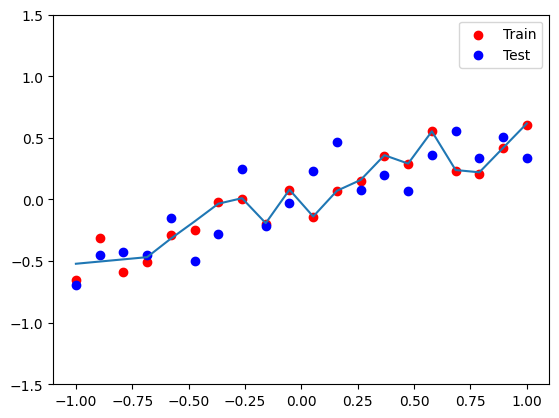

In [17]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_1)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

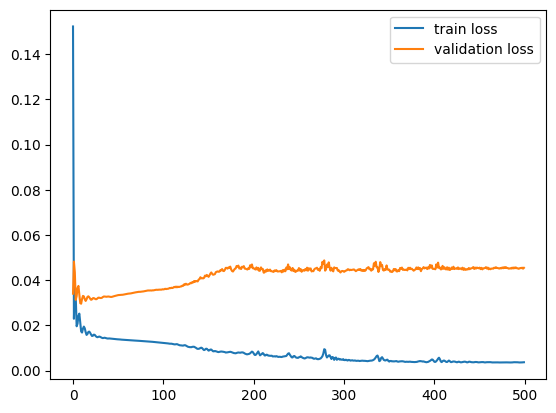

In [18]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

# Dropout Model
## with dropout rate = 0.2

In [19]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.2))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 0.1095 - mse: 0.1095 - val_loss: 0.0465 - val_mse: 0.0465
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 0.0444 - mse: 0.0444 - val_loss: 0.0364 - val_mse: 0.0364
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0299 - mse: 0.0299 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0466 - val_mse: 0.0466
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0357 - mse: 0.0357 - val_loss: 0.0453 - val_mse: 0.0453
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0391 - mse: 0.0391 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0181 - 

In [20]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.011660996824502945, Test: 0.04040484502911568


In [21]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


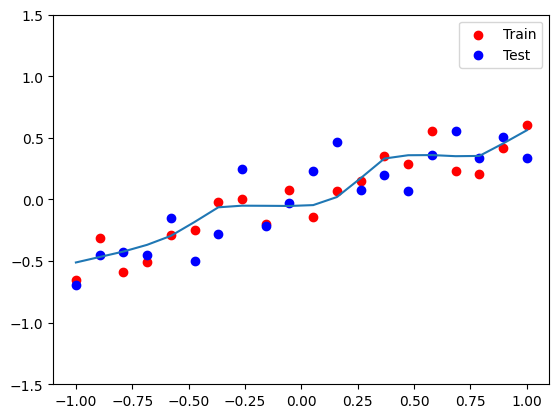

In [22]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

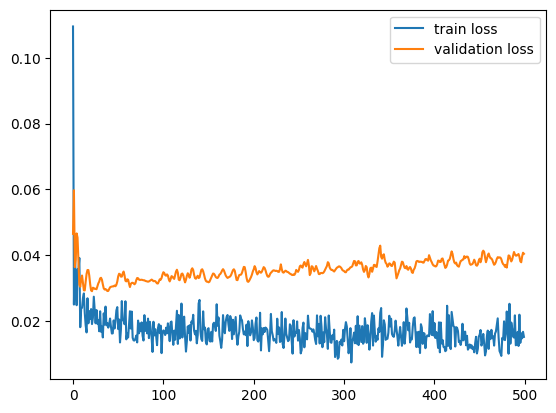

In [23]:
plt.plot(drop_out_history.history['loss'], label = 'train loss')
plt.plot(drop_out_history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

# Dropout Model
## with dropout rate = 0.5

In [25]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=1, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(128, activation="relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model_2.compile(loss='mse', optimizer=adam, metrics=['mse'])

drop_out_history = model_2.fit(X_train, y_train, epochs=500, 
                               validation_data = (X_test, y_test),
                               verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1601 - mse: 0.1601 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0397 - val_mse: 0.0397
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0471 - mse: 0.0471 - val_loss: 0.0415 - val_mse: 0.0415
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0569 - mse: 0.0569 - val_loss: 0.0316 - val_mse: 0.0316
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0248 - mse: 0.0248 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0133 - mse: 0.0133 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0395 - val_mse: 0.0395
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0375 - mse: 0.0375 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0391 - mse: 0.

In [26]:
# evaluate the model
_, train_mse = model_2.evaluate(X_train, y_train, verbose=0)
_, test_mse = model_2.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.015885891392827034, Test: 0.03527812287211418


In [27]:
y_pred_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


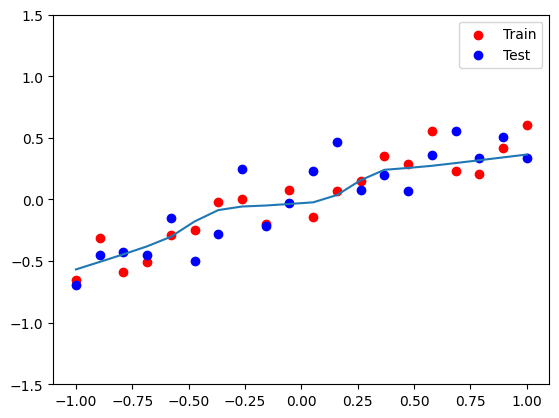

In [28]:
plt.figure()
plt.scatter(X_train, y_train, c='red', label='Train')
plt.scatter(X_test, y_test, c='blue', label='Test')
plt.plot(X_test, y_pred_2)
plt.legend()
plt.ylim((-1.5, 1.5))
plt.show()

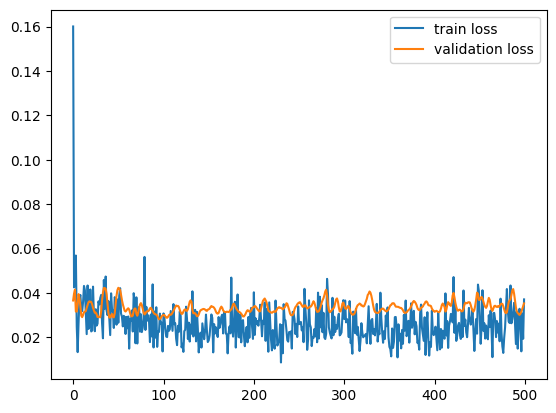

In [29]:
plt.plot(drop_out_history.history['loss'], label = 'train loss')
plt.plot(drop_out_history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()